This step focuses on collecting data, organizing it, cleanining it, and making sure it's well defined.

_Importing libraries_

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


_Loading Appliances Energy Usage Data_

In [2]:
appliances_data = pd.read_csv('C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data/energydata.csv')

_Data Science Problem_

The purpose of this data science project is to come up with a model to predict the applainces energy usage based on consumner's house temperature and humidity conditions plus outside enviromental conditions 

In [3]:
appliances_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
appliances_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
appliances_data.isnull().values.any()

False

_Rename columns for more readability_

In [6]:
appliances_data= appliances_data.rename(index=str, columns={"Appliances":"Appliances_E_Wh", "lights": "Lights_E_Wh","T1":"T_Kitchen", "RH_1":"H_Kitchen", "T2":"T_Living", "RH_2":"H_Living", "T3":"T_Laundry", "RH_3":"H_Laundry", "T4":"T_Office", "RH_4":"H_Office", "T5":"T_Bathroom", "RH_5":"H_Bathroom", "T6":"T_Building_out_NS", "RH_6":"H_Building_out_NS",
"T7":"T_Ironning", "RH_7":"H_Ironing", "T8":"T_Teenager", "RH_8":"H_Teenager", "T9":"T_Parents", "RH_9":"H_Parents", "Press_mm_hg": "Press_out", "RH_out":"H_out", "rv1":"RV_1", "rv2": "RV_2"})

In [7]:
appliances_data.head()

,date,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,...,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint,RV_1,RV_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
appliances_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances_E_Wh,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
Lights_E_Wh,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T_Kitchen,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
H_Kitchen,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T_Living,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
H_Living,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T_Laundry,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
H_Laundry,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T_Office,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
H_Office,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [11]:
df = appliances_data

In [13]:
df['Lights_E_Wh'].describe()

count    19735.000000
mean         3.801875
std          7.935988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: Lights_E_Wh, dtype: float64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances_E_Wh,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
Lights_E_Wh,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T_Kitchen,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
H_Kitchen,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T_Living,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
H_Living,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T_Laundry,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
H_Laundry,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T_Office,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
H_Office,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


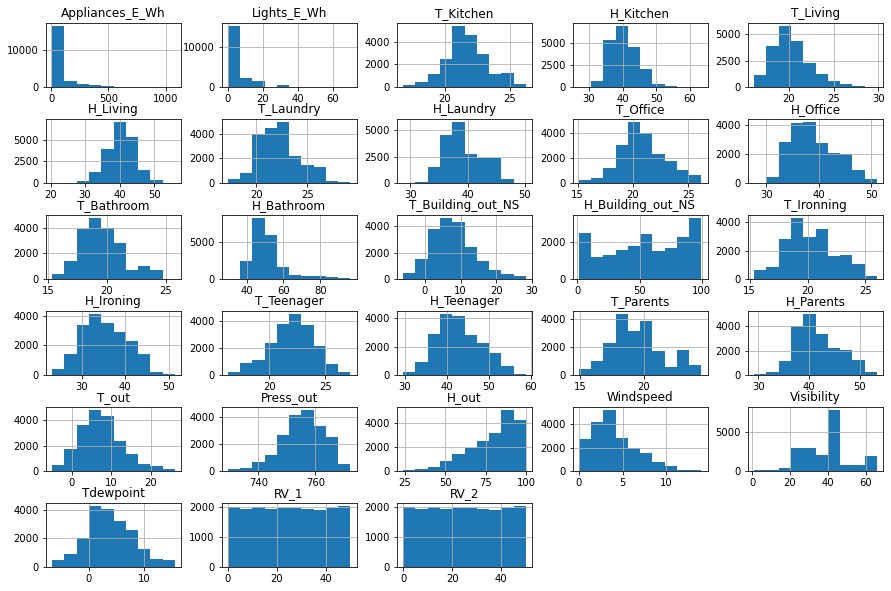

In [18]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);